In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in the data
breast_cancer = pd.read_csv("C:/JOY DOCUMENTS/MSBA 2023/APPLIED MACHINE LEARNING/Assignment One/breast-cancer.csv")

breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
breast_cancer['id'] = breast_cancer['id'].astype(str)

breast_cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# Check for missing values
print(breast_cancer.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
breast_cancer.shape

(569, 32)

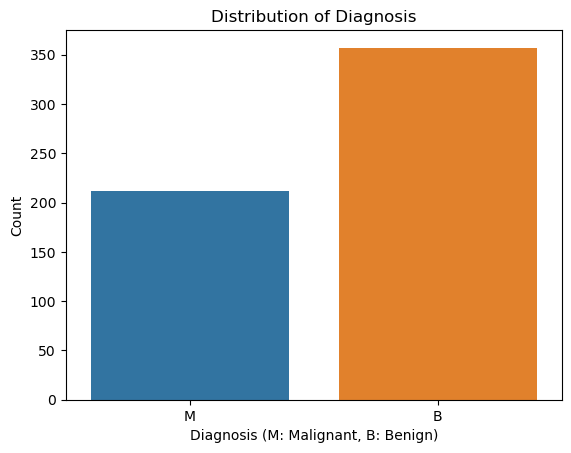

In [7]:
# Visualize the distribution of diagnosis
sns.countplot(breast_cancer['diagnosis'])
plt.xlabel('Diagnosis (M: Malignant, B: Benign)')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis')
plt.show()

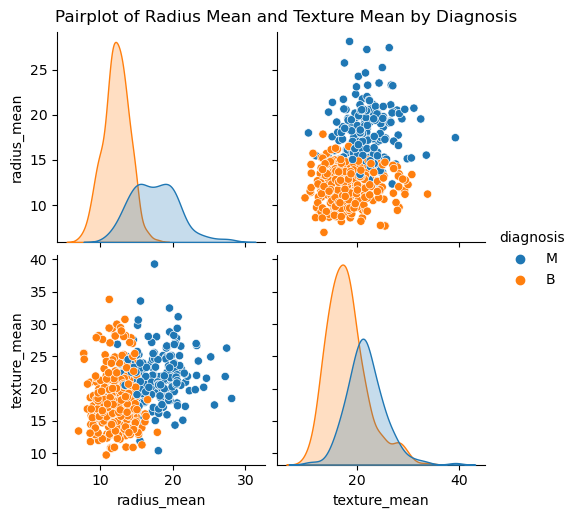

In [8]:
# Pairplot to visualize relationships between predictor variables
g = sns.pairplot(breast_cancer, hue='diagnosis', vars=["radius_mean", "texture_mean"])
g.fig.suptitle('Pairplot of Radius Mean and Texture Mean by Diagnosis', y=1.02)
plt.show()

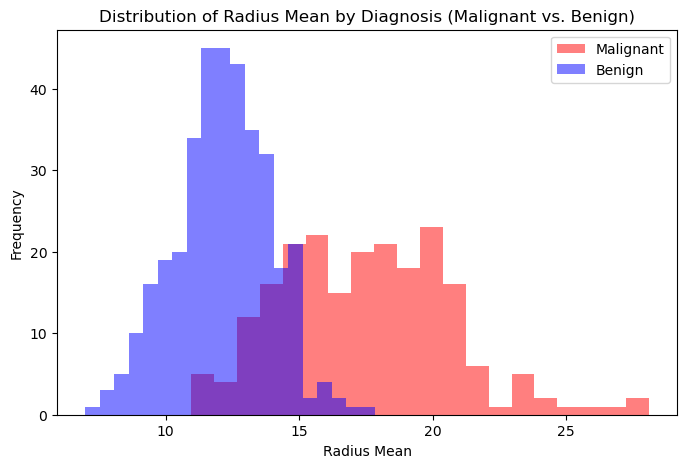

In [9]:
# Separate data for malignant and benign tumors
malignant_data = breast_cancer[breast_cancer['diagnosis'] == 'M']
benign_data = breast_cancer[breast_cancer['diagnosis'] == 'B']

# Create histograms to visualize the distribution of 'radius_mean' for both classes
plt.figure(figsize=(8, 5))
plt.hist(malignant_data['radius_mean'], bins=20, alpha=0.5, label='Malignant', color='red')
plt.hist(benign_data['radius_mean'], bins=20, alpha=0.5, label='Benign', color='blue')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Radius Mean by Diagnosis (Malignant vs. Benign)')
plt.legend()
plt.show()

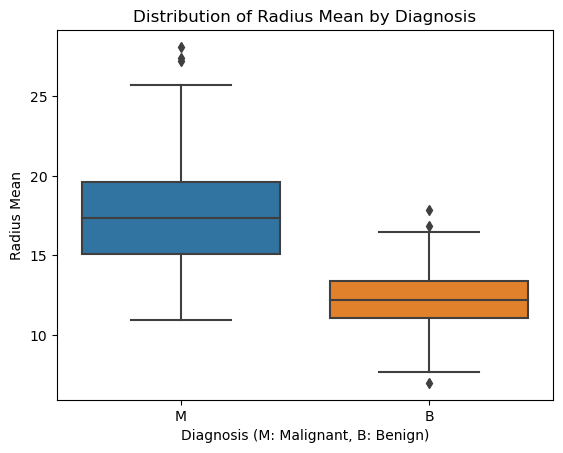

In [10]:
# Boxplot to visualize feature distribution by diagnosis
sns.boxplot(x='diagnosis', y='radius_mean', data=breast_cancer)
plt.xlabel('Diagnosis (M: Malignant, B: Benign)')
plt.ylabel('Radius Mean')
plt.title('Distribution of Radius Mean by Diagnosis')
plt.show()

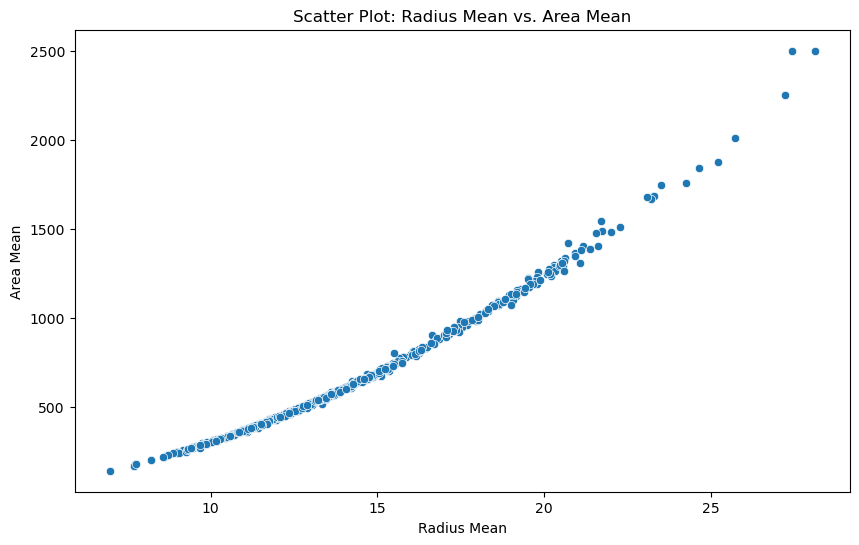

In [11]:
# Scatter plot to visualize the relationship between predictor and target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(x='radius_mean', y='area_mean', data=breast_cancer)
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.title('Scatter Plot: Radius Mean vs. Area Mean')
plt.show()

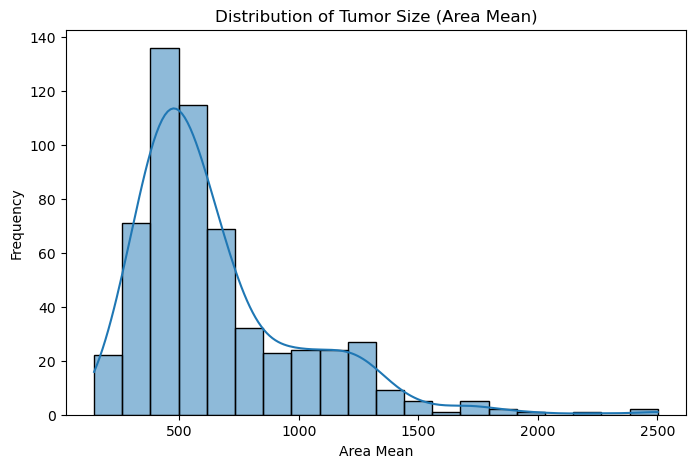

In [12]:
# Distribution of tumor size (Area Mean)
plt.figure(figsize=(8, 5))
sns.histplot(breast_cancer['area_mean'], bins=20, kde=True)
plt.xlabel('Area Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Tumor Size (Area Mean)')
plt.show()

In [13]:
# Business problem 1
# Extract X - the IVs (features)
X = breast_cancer[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

# Extract Y - contains the DV (diagnosis)
y = breast_cancer['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X contains predictor variables and y contains the target variable (diagnosis)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

# Model 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Model 3: Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Print accuracy scores for each model
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)

# Determine the best model based on accuracy
best_model = max({
    "Logistic Regression": logistic_accuracy,
    "Random Forest": rf_accuracy,
    "Support Vector Machine": svm_accuracy
}.items(), key=lambda x: x[1])

print(f"The best model is {best_model[0]} with an accuracy of {best_model[1]:.2f}")


Logistic Regression Accuracy: 0.9298245614035088
Random Forest Accuracy: 0.9473684210526315
Support Vector Machine Accuracy: 0.9210526315789473
The best model is Random Forest with an accuracy of 0.95


In [14]:
# Business problem 2
# Extract X - the IVs (features)
X = breast_cancer[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

# Extract Y - contains the DV (diagnosis)
y = breast_cancer['diagnosis']

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Recursive Feature Elimination (RFE)
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=5, step=1)
rfe_selector.fit(X_train, y_train)
selected_features_rfe = X.columns[rfe_selector.support_]

# Model 2: Feature Importance from Random Forest
rf_selector = RandomForestClassifier()
rf_selector.fit(X_train, y_train)
importances = rf_selector.feature_importances_
selected_features_rf = X.columns[importances.argsort()[::-1][:5]]

# Model 3: L1 Regularization (Lasso)
l1_selector = LinearSVC(C=0.01, penalty="l1", dual=False)
l1_selector.fit(X_train, y_train)
coef = l1_selector.coef_
selected_features_l1 = X.columns[coef[0].argsort()[::-1][:5]]

# Print selected features for each method
print("RFE Selected Features:", selected_features_rfe)
print("RF Selected Features:", selected_features_rf)
print("L1 Selected Features:", selected_features_l1)

# For each set of selected features, calculate accuracy
accuracy_rfe = accuracy_score(y_validation, rfe_selector.predict(X_validation))
accuracy_rf = accuracy_score(y_validation, rf_selector.predict(X_validation))
accuracy_l1 = accuracy_score(y_validation, l1_selector.predict(X_validation))

# Compare accuracy scores
print("Accuracy with RFE-selected Features:", accuracy_rfe)
print("Accuracy with RF-selected Features:", accuracy_rf)
print("Accuracy with L1-selected Features:", accuracy_l1)

RFE Selected Features: Index(['concavity_mean', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')
RF Selected Features: Index(['concave points_mean', 'radius_worst', 'area_worst', 'perimeter_worst',
       'concave points_worst'],
      dtype='object')
L1 Selected Features: Index(['texture_worst', 'area_worst', 'area_se', 'fractal_dimension_worst',
       'symmetry_worst'],
      dtype='object')
Accuracy with RFE-selected Features: 0.8508771929824561
Accuracy with RF-selected Features: 0.9649122807017544
Accuracy with L1-selected Features: 0.9385964912280702


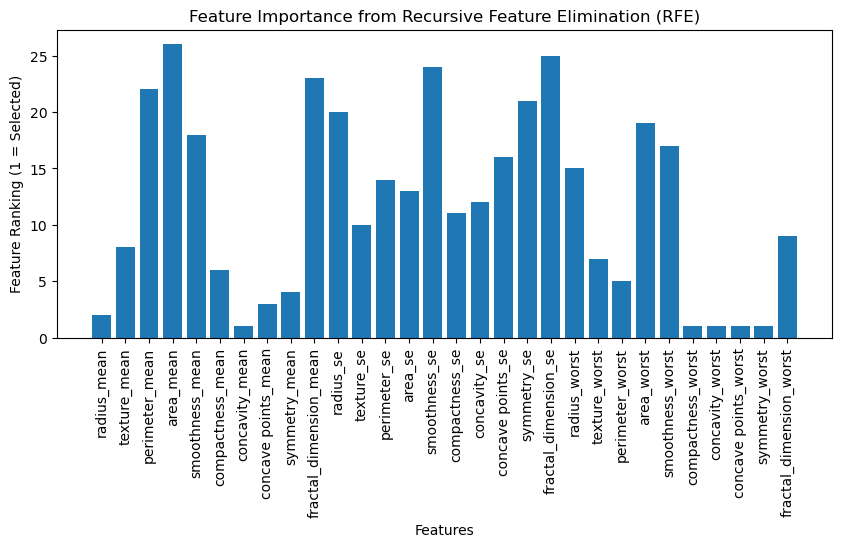

In [15]:
# Visualize feature importance from RFE

# Get the ranking of features from RFE (1 indicates selected features)
feature_ranking = rfe_selector.ranking_

plt.figure(figsize=(10, 4))
plt.bar(range(len(feature_ranking)), feature_ranking)
plt.xticks(range(len(feature_ranking)), X.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Ranking (1 = Selected)')
plt.title('Feature Importance from Recursive Feature Elimination (RFE)')
plt.show()

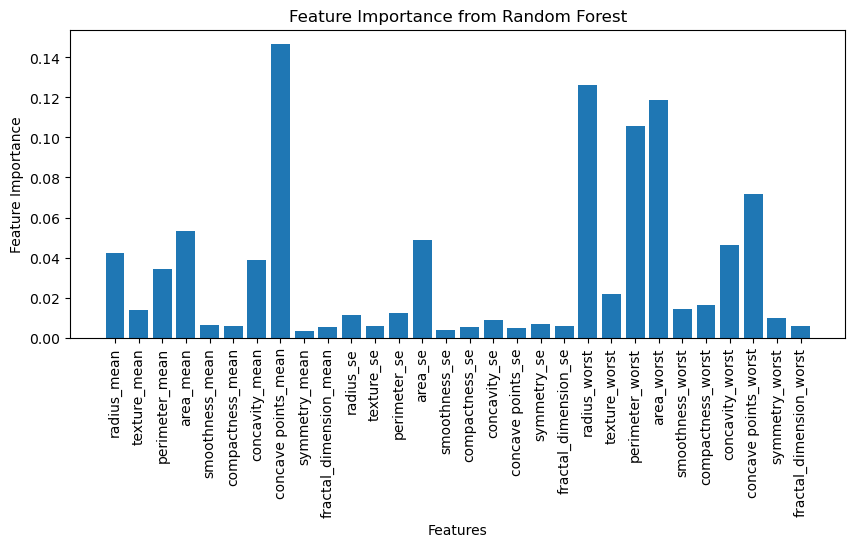

In [16]:
# Visualize feature importance from Random Forest
plt.figure(figsize=(10, 4))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

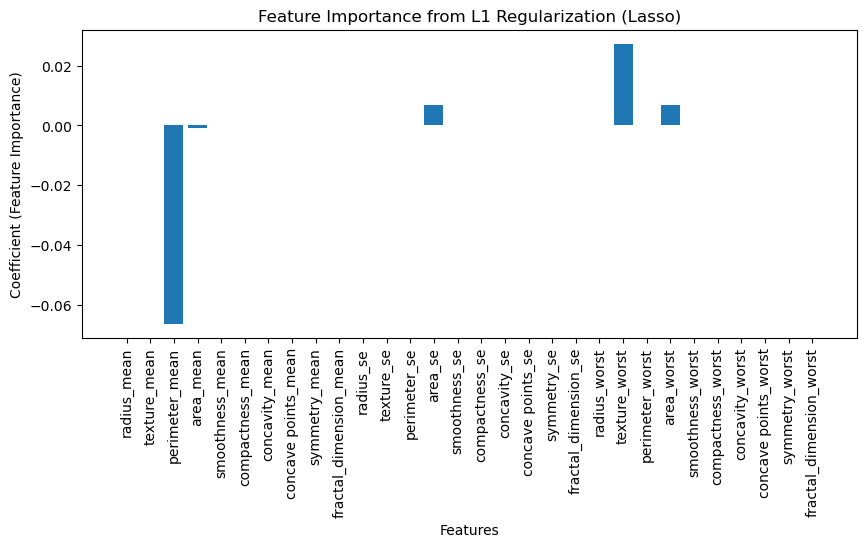

In [17]:
# Visualize feature importance from L1 Regularization
plt.figure(figsize=(10, 4))
plt.bar(range(len(coef[0])), coef[0])
plt.xticks(range(len(coef[0])), X.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient (Feature Importance)')
plt.title('Feature Importance from L1 Regularization (Lasso)')
plt.show()

In [62]:
# Business problem 3
# Extract X - the IVs (features)
X = breast_cancer[['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se',
                    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
                   'concave points_worst',  'symmetry_worst', 'fractal_dimension_worst']]

# Extract Y - contains the DV 
y = breast_cancer['area_mean']

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_validation)
linear_mse = mean_squared_error(y_validation, linear_predictions)
linear_r2 = r2_score(y_validation, linear_predictions)

# Model 2: Random Forest Regression
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_validation)
rf_mse = mean_squared_error(y_validation, rf_predictions)
rf_r2 = r2_score(y_validation, rf_predictions)

# Model 3: Gradient Boosting Regression
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
gb_predictions = gb_regressor.predict(X_validation)
gb_mse = mean_squared_error(y_validation, gb_predictions)
gb_r2 = r2_score(y_validation, gb_predictions)

# Print evaluation metrics for each model
print("Model 1 - Linear Regression:")
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)
print()

print("Model 2 - Random Forest Regression:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)
print()

print("Model 3 - Gradient Boosting Regression:")
print("Mean Squared Error:", gb_mse)
print("R-squared:", gb_r2)

Model 1 - Linear Regression:
Mean Squared Error: 511.43050212126093
R-squared: 0.9955647902527678

Model 2 - Random Forest Regression:
Mean Squared Error: 328.9194510877191
R-squared: 0.9971475562183567

Model 3 - Gradient Boosting Regression:
Mean Squared Error: 400.50100319339356
R-squared: 0.9965267891809894
